In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

In [2]:
billboard_df = pd.read_csv('./artist_data.csv')

In [3]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds):
    print('R² score: \n',r2_score(y,preds))
    print('RSME: \n',math.sqrt(mean_squared_error(y,preds)))
    print('MAE: \n',mean_absolute_error(y,preds))


In [4]:
billboard_df = drop_specific_cols(billboard_df, ['e_spotify', 'e_grammy'])

In [5]:
#variable to predict
y = billboard_df.e_billboard

In [6]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
billboard_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature','artist_hotttnesss']
X = billboard_df[billboard_features]

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)

In [10]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
rf_billboard_preds = forest_model.predict(val_X)
print(rf_billboard_preds)

[26.73 54.45  9.9 ]


In [9]:
results(val_y, rf_billboard_preds)

R² score: 
 -0.18707649863760234
RSME: 
 52.06491268919341
MAE: 
 39.20666666666667


In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [11]:
svm_model = SVC(kernel='sigmoid', random_state=1)
svm_model.fit(train_X, train_y)
svm_billboard_preds = svm_model.predict(val_X)

Matrix confusion:


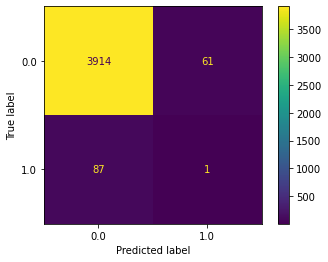

Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3975
         1.0       0.02      0.01      0.01        88

    accuracy                           0.96      4063
   macro avg       0.50      0.50      0.50      4063
weighted avg       0.96      0.96      0.96      4063

Accuracy score: 
 0.9635737140044303
Absolute error:
 0.036426285995569775


In [12]:
results(val_y, svm_billboard_preds)

In [13]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_billboard_preds = knn_model.predict(val_X)

Matrix confusion:


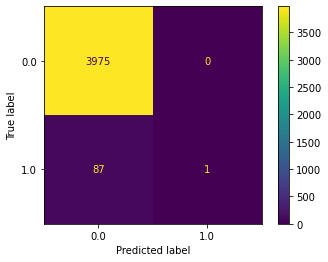

Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3975
         1.0       1.00      0.01      0.02        88

    accuracy                           0.98      4063
   macro avg       0.99      0.51      0.51      4063
weighted avg       0.98      0.98      0.97      4063

Accuracy score: 
 0.9785872507999015
Absolute error:
 0.02141274920009845


In [15]:
results(val_y, knn_billboard_preds)

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [17]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(train_X, train_y)
logistic_billboard_preds = logistic_model.predict(val_X)

Matrix confusion:


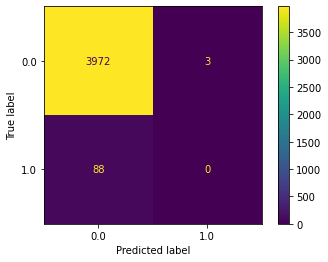

Classification report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3975
         1.0       0.00      0.00      0.00        88

    accuracy                           0.98      4063
   macro avg       0.49      0.50      0.49      4063
weighted avg       0.96      0.98      0.97      4063

Accuracy score: 
 0.977602756583805
Absolute error:
 0.02239724341619493


In [18]:
results(val_y, logistic_billboard_preds)